In [83]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
import random
%matplotlib inline

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [67]:
df= pd.read_csv('churn.csv')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   international_plan             5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### 1.Построить гистограмму количества звонков в техническую поддержку

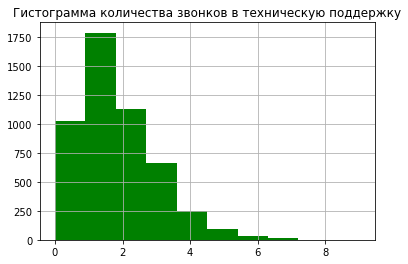

In [3]:
plt.hist(df['number_customer_service_calls'], 10, facecolor='g')
plt.title('Гистограмма количества звонков в техническую поддержку')
plt.grid(True)
plt.show()

#### 2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международных)

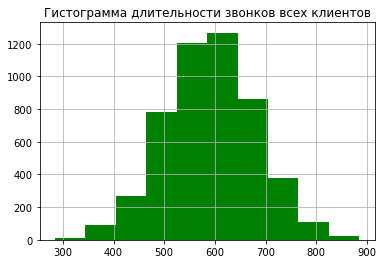

In [68]:
df['total_minutes'] = df['total_day_minutes']+df['total_eve_minutes']+df['total_night_minutes']+df['total_intl_minutes'] 
plt.hist(df['total_minutes'], facecolor='g')
plt.title('Гистограмма длительности звонков всех клиентов')
plt.grid(True)
plt.show()

#### 3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку

In [43]:
X = df['total_minutes']
Y = df['number_customer_service_calls']
n = len(X)
X_sred = sum(X) / n
Y_sred = sum(Y) / n 
znam_x, znam_y, chis = 0, 0, 0
for i in range(n):
    chis += (X[i] - X_sred) * (Y[i] - Y_sred)
    znam_x += (X[i] - X_sred) ** 2
    znam_y += (Y[i] - Y_sred) ** 2
print('Коэффициент корреляции Пирсона:', chis / ((znam_x *znam_y) ** 0.5))

Коэффициент корреляции Пирсона: -0.01140791082744116


#### 4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

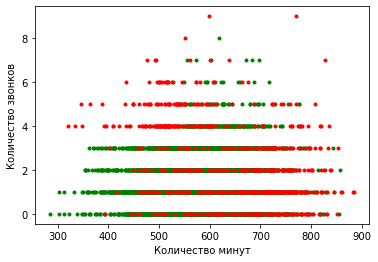

In [47]:
plt.scatter(df[df['churned']==False]['total_minutes'], df[df['churned']==False]['number_customer_service_calls'], marker='.',color='g')
plt.scatter(df[df['churned']==True]['total_minutes'], df[df['churned']==True]['number_customer_service_calls'], marker='.', color='red')
plt.xlabel('Количество минут')
plt.ylabel('Количество звонков')
plt.show()

#### 5. Вывести top-5 самых много и самых мало говорящих клиентов

In [51]:
data=df.sort_values(by='total_minutes', ascending=False)
print('top-5 многоговорящих клиентов: \n',data.phone_number.values[:5])
print('top-5 малоговорящих  клиентов: \n',data.phone_number.values[-5:])

top-5 многоговорящих клиентов: 
 ['345-9140' '352-6976' '345-3787' '410-3888' '370-4667']
top-5 малоговорящих  клиентов: 
 ['375-8934' '405-9233' '362-8044' '380-5246' '331-3174']


#### 6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

In [61]:
states = list(set(df.state))
for state in states:
    print(state+'|  Доля оттока клиентов: ', 
          round(df[ (df.churned == True) & (df.state == state)].count().
                values[0] / df[df.state == state].count().values[0] * 100, 2),'%')
    print('  |  Средняя стоимость минуты дневного времени разговора:', 
          round(sum(df[ (df.state == state)].total_day_minutes/df[ (df.state == state)].
                    total_day_charge) / df[df.state == state].count().values[0], 5),'\n')

WA|  Доля оттока клиентов:  24.49 %
  |  Средняя стоимость минуты дневного времени разговора: 5.8823 

MI|  Доля оттока клиентов:  17.48 %
  |  Средняя стоимость минуты дневного времени разговора: 5.88226 

MO|  Доля оттока клиентов:  12.9 %
  |  Средняя стоимость минуты дневного времени разговора: 5.88209 

TX|  Доля оттока клиентов:  22.41 %
  |  Средняя стоимость минуты дневного времени разговора: 5.88225 

OH|  Доля оттока клиентов:  12.93 %
  |  Средняя стоимость минуты дневного времени разговора: 5.88207 

AL|  Доля оттока клиентов:  10.48 %
  |  Средняя стоимость минуты дневного времени разговора: 5.88231 

DE|  Доля оттока клиентов:  15.96 %
  |  Средняя стоимость минуты дневного времени разговора: 5.88217 

CT|  Доля оттока клиентов:  16.16 %
  |  Средняя стоимость минуты дневного времени разговора: 5.8823 

NY|  Доля оттока клиентов:  17.54 %
  |  Средняя стоимость минуты дневного времени разговора: 5.88223 

NC|  Доля оттока клиентов:  13.19 %
  |  Средняя стоимость минуты д

#### 7. перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark

In [69]:
pd.get_dummies(df['state'])

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 8. Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)

In [70]:
df=df.drop (columns = ['total_minutes', 'phone_number', 'area_code','international_plan','voice_mail_plan'])
df.head(5)

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [71]:
df = pd.get_dummies(df, ['state'])
data.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned', 'total_minutes'],
      dtype='object')

In [129]:
x, y = df[['account_length', 'total_day_minutes', 'total_eve_minutes',
             'total_night_minutes', 'number_customer_service_calls', 'total_intl_minutes',
             'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
             'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
             'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
             'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
             'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
             'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
             'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
             'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
             'state_WY']], df['churned']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### 9. Привести данные к одному масштабу при помощи StandardScaler в случае Pandas

In [149]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [151]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
predicted_y = logreg_clf.predict(X_test)
print('Точность - ', logreg_clf.score(X_test, y_test))

Точность -  0.862
